# Introduction to NetworkX: Building and Analyzing Networks in Python

**Topic:** Network Science Fundamentals

---

## Learning Objectives

By the end of this notebook, you will be able to:
- Create and manipulate network graphs using NetworkX
- Understand the difference between directed and undirected networks
- Add and access node and edge attributes
- Import network data from various file formats
- Visualize networks effectively
- Calculate fundamental network metrics
- Analyze network connectivity and structure

---

## What is NetworkX?

NetworkX is a Python library for creating, analyzing, and visualizing complex networks (also called graphs). Networks consist of:
- **Nodes** (also called vertices): entities in your network
- **Edges** (also called links): connections between nodes

Networks are everywhere: social networks, transportation systems, biological systems, the internet, and more!

In [25]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Set up plotting style
plt.style.use('default')
%matplotlib inline

---

## 1. Creating Your First Network

### 1.1 Undirected Graphs

Let's start by creating a simple friendship network where edges represent mutual friendships.

In [26]:
# Create an empty undirected graph
G = nx.Graph()

# Add nodes one at a time
G.add_node("Alice")
G.add_node("Bob")

# Or add multiple nodes at once
G.add_nodes_from(["Charlie", "Diana", "Eve"])

# Check what we've created
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Nodes: {list(G.nodes())}")

Number of nodes: 5
Nodes: ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve']


In [27]:
# Add edges (connections between nodes)
G.add_edge("Alice", "Bob")
G.add_edge("Alice", "Charlie")
G.add_edge("Bob", "Charlie")
G.add_edge("Charlie", "Diana")
G.add_edge("Diana", "Eve")

print(f"Number of edges: {G.number_of_edges()}")
print(f"Edges: {list(G.edges())}")

Number of edges: 5
Edges: [('Alice', 'Bob'), ('Alice', 'Charlie'), ('Bob', 'Charlie'), ('Charlie', 'Diana'), ('Diana', 'Eve')]


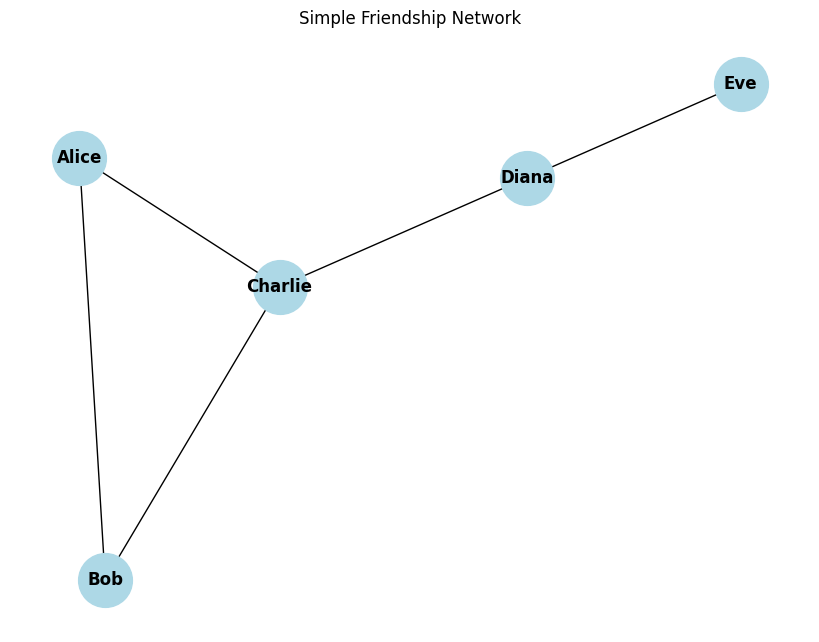

In [28]:
# Visualize the network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=12, font_weight='bold')
plt.title("Simple Friendship Network")
plt.show()

### 1.2 Directed Graphs (DiGraphs)

In directed networks, edges have a direction. For example, "Alice follows Bob" doesn't mean "Bob follows Alice".

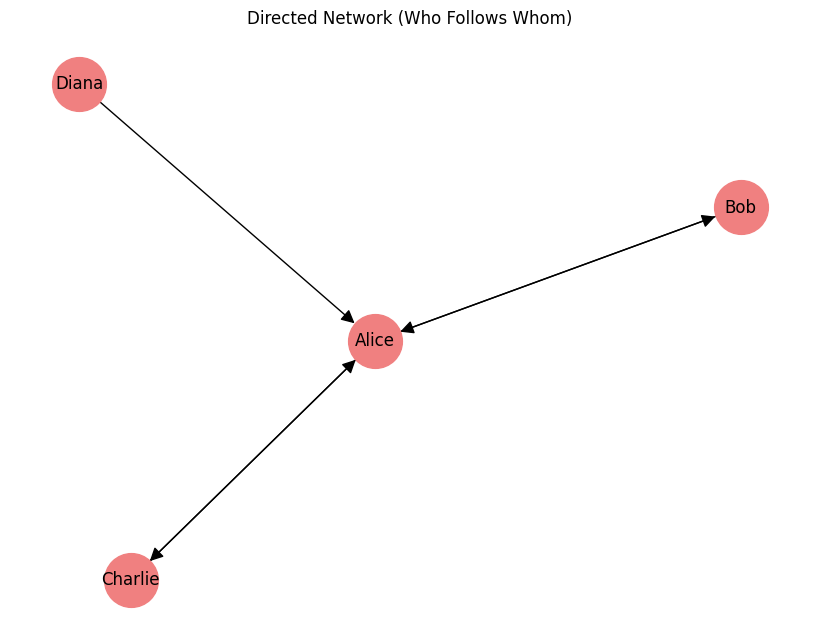

Alice is followed by: ['Bob', 'Charlie', 'Diana']
Alice follows: ['Bob', 'Charlie']


In [29]:
# Create a directed graph for Twitter-like follows
DG = nx.DiGraph()

# Add nodes and edges
DG.add_nodes_from(["Alice", "Bob", "Charlie", "Diana"])

# Directed edges: (from, to)
DG.add_edges_from([
    ("Alice", "Bob"),      # Alice follows Bob
    ("Alice", "Charlie"),  # Alice follows Charlie
    ("Bob", "Alice"),      # Bob follows Alice (reciprocal)
    ("Charlie", "Alice"),  # Charlie follows Alice
    ("Diana", "Alice")     # Diana follows Alice
])

# Visualize
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG, seed=42)  # Fixed layout for reproducibility
nx.draw(DG, pos, with_labels=True, node_color='lightcoral',
        node_size=1500, font_size=12, arrows=True, arrowsize=20)
plt.title("Directed Network (Who Follows Whom)")
plt.show()

print(f"Alice is followed by: {list(DG.predecessors('Alice'))}")
print(f"Alice follows: {list(DG.successors('Alice'))}")

---

## 2. Node and Edge Attributes

Real-world networks contain rich information. We can attach attributes to both nodes and edges.

### 2.1 Node Attributes

In [30]:
# Create a network of cities
G_cities = nx.Graph()

# Add nodes with attributes
G_cities.add_node("Berlin", country="Germany", population=3645000, latitude=52.52, longitude=13.40)
G_cities.add_node("Paris", country="France", population=2161000, latitude=48.86, longitude=2.35)
G_cities.add_node("London", country="UK", population=8982000, latitude=51.51, longitude=-0.13)

# Access node attributes
print("Berlin's attributes:")
print(G_cities.nodes['Berlin'])

# Access specific attribute
print(f"\nParis population: {G_cities.nodes['Paris']['population']:,}")

# Get all nodes with their attributes
print("\nAll cities with attributes:")
for node, attrs in G_cities.nodes(data=True):
    print(f"{node}: {attrs}")

Berlin's attributes:
{'country': 'Germany', 'population': 3645000, 'latitude': 52.52, 'longitude': 13.4}

Paris population: 2,161,000

All cities with attributes:
Berlin: {'country': 'Germany', 'population': 3645000, 'latitude': 52.52, 'longitude': 13.4}
Paris: {'country': 'France', 'population': 2161000, 'latitude': 48.86, 'longitude': 2.35}
London: {'country': 'UK', 'population': 8982000, 'latitude': 51.51, 'longitude': -0.13}


### 2.2 Edge Attributes and Weighted Networks

In [31]:
# Add edges with weights (e.g., flight distances in km)
G_cities.add_edge("Berlin", "Paris", distance=878, travel_time=1.5)
G_cities.add_edge("Berlin", "London", distance=932, travel_time=1.75)
G_cities.add_edge("Paris", "London", distance=344, travel_time=1.0)

# Access edge attributes
print("Edge between Berlin and Paris:")
print(G_cities.edges['Berlin', 'Paris'])

# Iterate over edges with attributes
print("\nAll connections:")
for u, v, attrs in G_cities.edges(data=True):
    print(f"{u} <-> {v}: {attrs['distance']} km, {attrs['travel_time']} hours")

Edge between Berlin and Paris:
{'distance': 878, 'travel_time': 1.5}

All connections:
Berlin <-> Paris: 878 km, 1.5 hours
Berlin <-> London: 932 km, 1.75 hours
Paris <-> London: 344 km, 1.0 hours


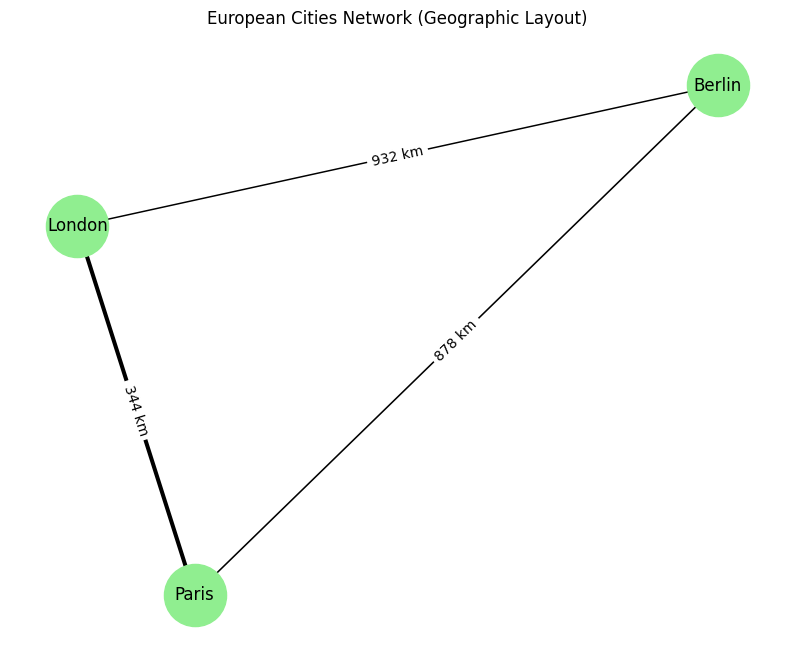

In [32]:
# Visualize with edge weights
plt.figure(figsize=(10, 8))

# Use geographical positions
pos = {node: (G_cities.nodes[node]['longitude'],
              G_cities.nodes[node]['latitude'])
       for node in G_cities.nodes()}

# Draw nodes
nx.draw_networkx_nodes(G_cities, pos, node_color='lightgreen', node_size=2000)

# Draw edges with width proportional to inverse distance (closer = thicker)
edges = G_cities.edges()
weights = [1000/G_cities[u][v]['distance'] for u, v in edges]
nx.draw_networkx_edges(G_cities, pos, width=weights)

# Draw labels
nx.draw_networkx_labels(G_cities, pos, font_size=12)

# Add edge labels
edge_labels = {(u, v): f"{G_cities[u][v]['distance']} km"
               for u, v in G_cities.edges()}
nx.draw_networkx_edge_labels(G_cities, pos, edge_labels, font_size=10)

plt.title("European Cities Network (Geographic Layout)")
plt.axis('off')
plt.show()

---

## 3. Importing Networks from Files

In real projects, you'll often load network data from files. Let's cover the most common formats.

### 3.1 From Edge Lists

An edge list is a simple format where each line represents an edge.

In [33]:
# Create a sample edge list file
edge_list_content = """Alice Bob
Alice Charlie
Bob Charlie
Charlie Diana
Diana Eve
"""

with open('network_edgelist.txt', 'w') as f:
    f.write(edge_list_content)

# Read the edge list
G_from_file = nx.read_edgelist('network_edgelist.txt')

print(f"Loaded network with {G_from_file.number_of_nodes()} nodes and {G_from_file.number_of_edges()} edges")
print(f"Nodes: {list(G_from_file.nodes())}")

Loaded network with 5 nodes and 5 edges
Nodes: ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve']


### 3.2 Weighted Edge Lists

In [34]:
# Create a weighted edge list
weighted_content = """Alice Bob 0.8
Alice Charlie 0.5
Bob Charlie 0.9
Charlie Diana 0.3
Diana Eve 0.6
"""

with open('weighted_edgelist.txt', 'w') as f:
    f.write(weighted_content)

# Read weighted edge list for directed graph
G_weighted = nx.read_weighted_edgelist('weighted_edgelist.txt',
                                        create_using=nx.DiGraph())

print("Edges with weights:")
for u, v, weight in G_weighted.edges(data='weight'):
    print(f"{u} -> {v}: {weight}")

Edges with weights:
Alice -> Bob: 0.8
Alice -> Charlie: 0.5
Bob -> Charlie: 0.9
Charlie -> Diana: 0.3
Diana -> Eve: 0.6


### 3.3 From Pandas DataFrames (CSV files)

Often, your network data comes from CSV files. Let's see how to build networks from pandas DataFrames.

In [35]:
# Create sample data
edges_data = {
    'source': ['Alice', 'Alice', 'Bob', 'Charlie', 'Diana'],
    'target': ['Bob', 'Charlie', 'Charlie', 'Diana', 'Eve'],
    'weight': [0.8, 0.5, 0.9, 0.3, 0.6],
    'interaction_type': ['message', 'call', 'message', 'email', 'call']
}

edges_df = pd.DataFrame(edges_data)
print("Edge DataFrame:")
print(edges_df)

# Create graph from DataFrame
G_from_df = nx.from_pandas_edgelist(
    edges_df,
    source='source',
    target='target',
    edge_attr=['weight', 'interaction_type'],
    create_using=nx.DiGraph()
)

print(f"\nCreated network with {G_from_df.number_of_edges()} edges")
print("\nSample edge with attributes:")
print(G_from_df.edges['Alice', 'Bob'])

Edge DataFrame:
    source   target  weight interaction_type
0    Alice      Bob     0.8          message
1    Alice  Charlie     0.5             call
2      Bob  Charlie     0.9          message
3  Charlie    Diana     0.3            email
4    Diana      Eve     0.6             call

Created network with 5 edges

Sample edge with attributes:
{'weight': 0.8, 'interaction_type': 'message'}


---

## 4. Network Properties and Metrics

### 4.1 Basic Graph Properties

In [36]:
# Create a sample network
G = nx.karate_club_graph()  # Famous network from social network analysis

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")
print(f"Is connected: {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

Number of nodes: 34
Number of edges: 78
Network density: 0.139
Is connected: True
Number of connected components: 1


### 4.2 Degree: The Most Basic Centrality Measure

The degree of a node is the number of edges connected to it.

In [37]:
# Get degree for all nodes
degrees = dict(G.degree())

# Find node with highest degree
max_degree_node = max(degrees, key=degrees.get)
print(f"Node with highest degree: {max_degree_node} (degree: {degrees[max_degree_node]})")

# Get top 5 nodes by degree
top_5_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by degree:")
for node, degree in top_5_nodes:
    print(f"Node {node}: {degree}")

Node with highest degree: 33 (degree: 17)

Top 5 nodes by degree:
Node 33: 17
Node 0: 16
Node 32: 12
Node 2: 10
Node 1: 9


---

## 5. Network Visualization Techniques

### 5.1 Layout Algorithms

Different layouts emphasize different network properties.

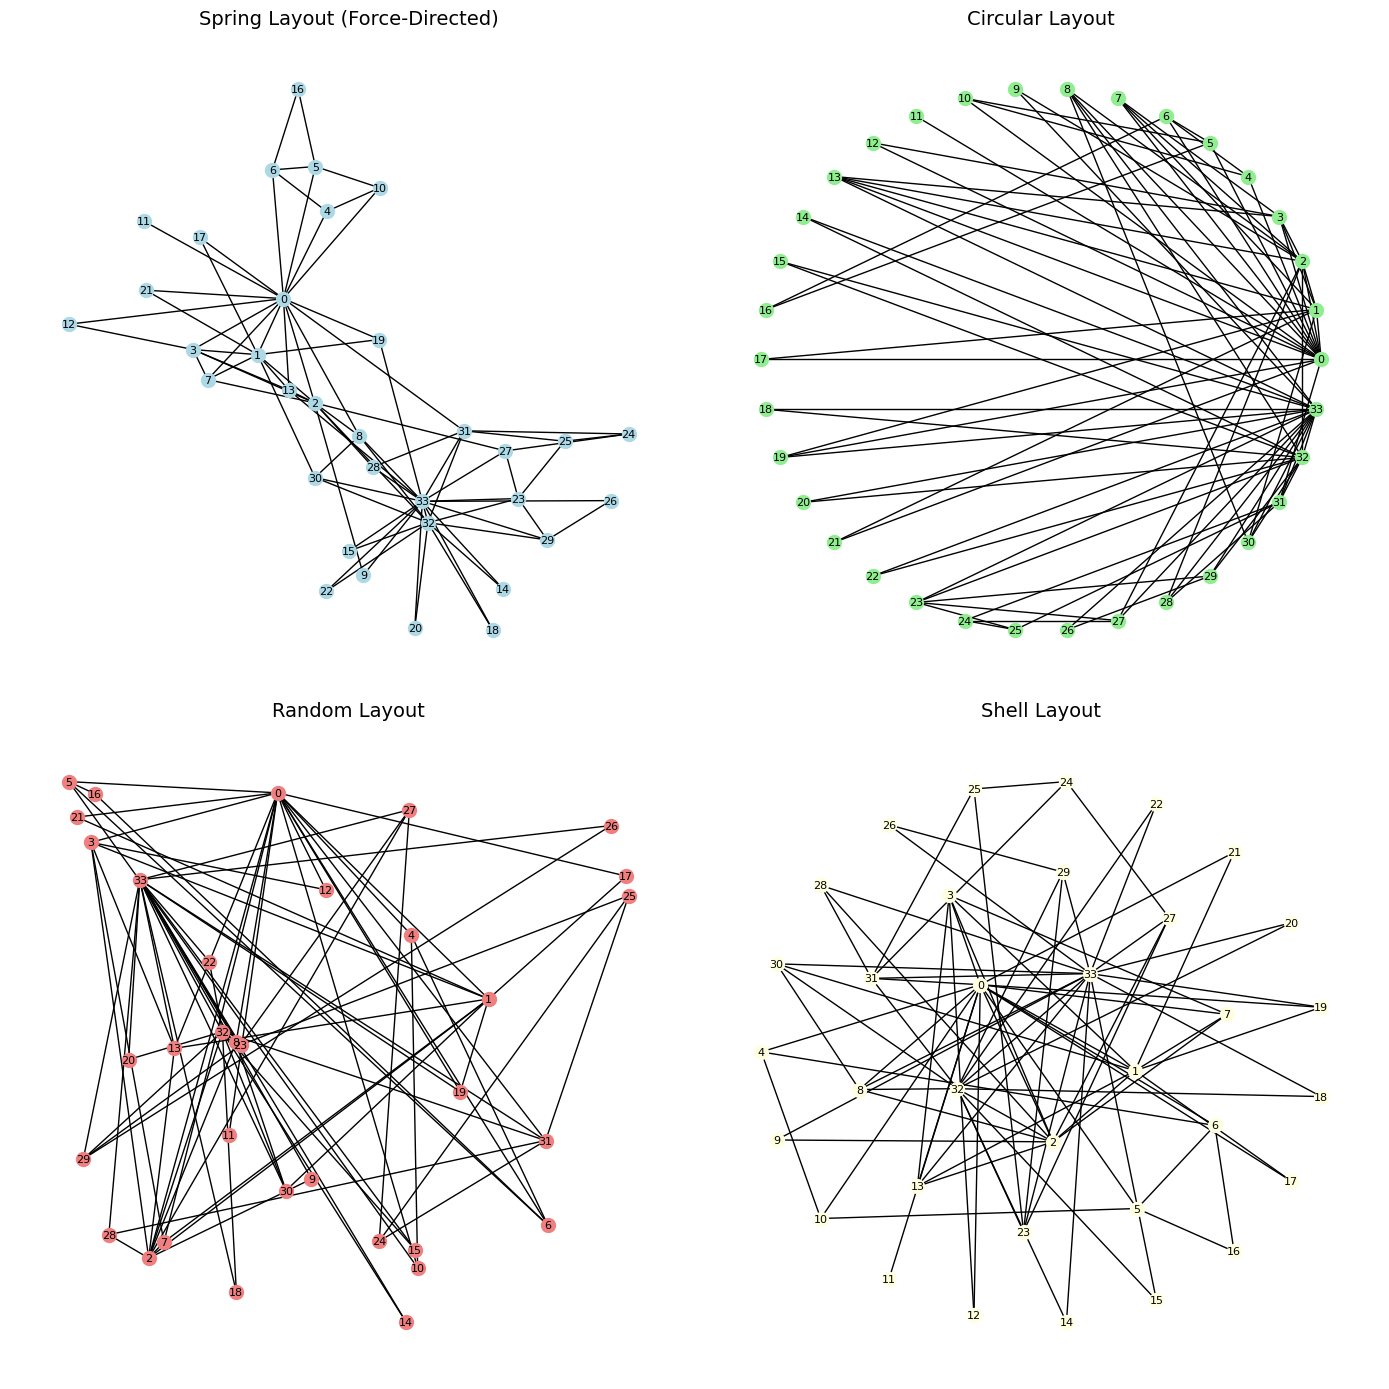

In [49]:
# Create a sample network
G_viz = nx.karate_club_graph()

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Spring layout (force-directed)
pos1 = nx.spring_layout(G_viz, seed=42)
axes[0, 0].set_title('Spring Layout (Force-Directed)', fontsize=14)
nx.draw(G_viz, pos1, ax=axes[0, 0], node_size=100, node_color='lightblue', with_labels=True, font_size=8)

# Circular layout
pos2 = nx.circular_layout(G_viz)
axes[0, 1].set_title('Circular Layout', fontsize=14)
nx.draw(G_viz, pos2, ax=axes[0, 1], node_size=100, node_color='lightgreen', with_labels=True, font_size=8)

# Random layout
pos3 = nx.random_layout(G_viz, seed=42)
axes[1, 0].set_title('Random Layout', fontsize=14)
nx.draw(G_viz, pos3, ax=axes[1, 0], node_size=100, node_color='lightcoral', with_labels=True, font_size=8)

# Shell layout
# Example: put high-degree nodes in center, others in outer rings
degrees = dict(G_viz.degree())
top_nodes = [n for n, d in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]]
middle_nodes = [n for n, d in sorted(degrees.items(), key=lambda x: x[1], reverse=True)[5:15]]
outer_nodes = [n for n in G.nodes() if n not in top_nodes and n not in middle_nodes]

pos4 = nx.shell_layout(G_viz, nlist=[top_nodes, middle_nodes, outer_nodes])
axes[1, 1].set_title('Shell Layout', fontsize=14)
nx.draw(G_viz, pos4, ax=axes[1, 1], node_size=100, node_color='lightyellow', with_labels=True, font_size=8)

plt.tight_layout()
plt.show()

### 5.2 Visualizing with Node Size by Centrality

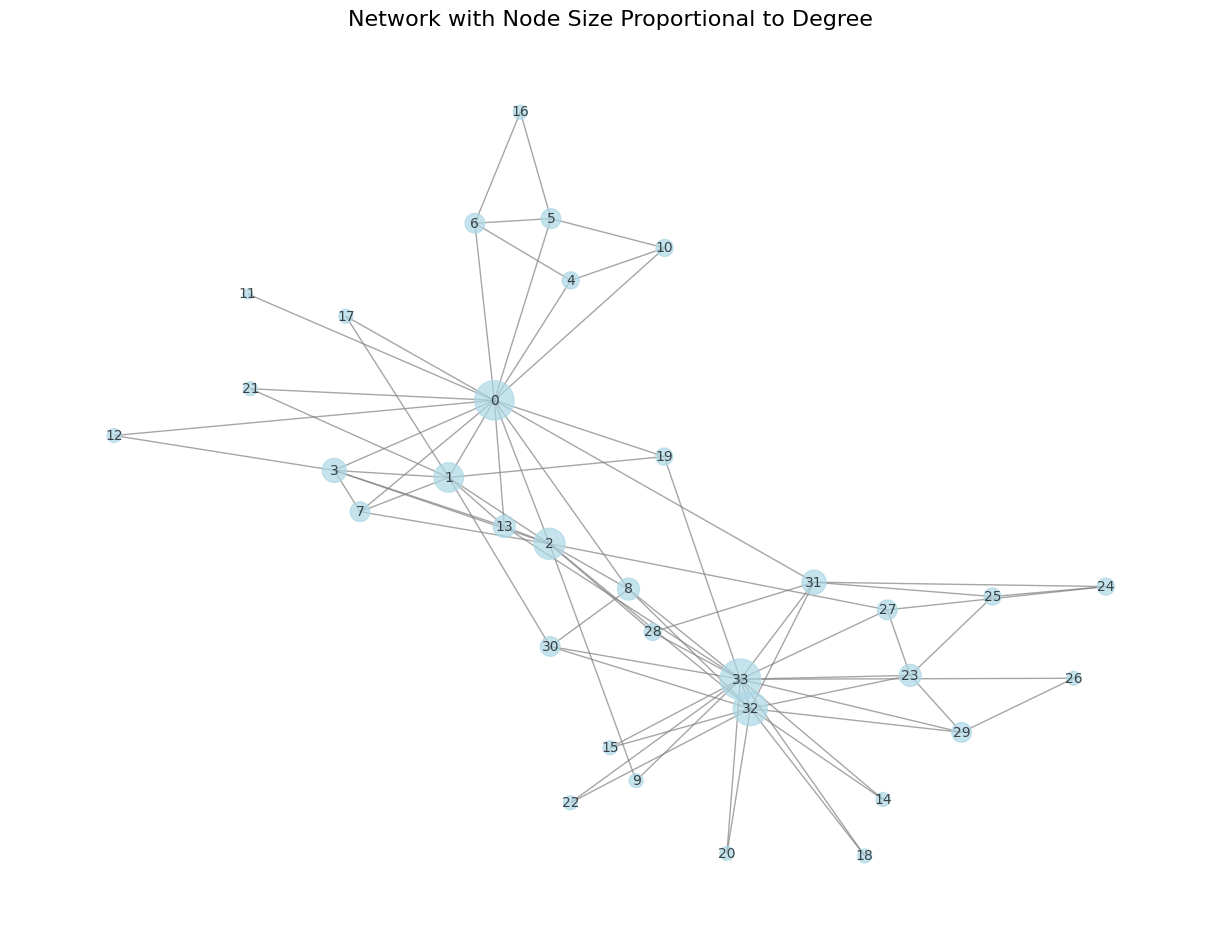

In [39]:
# Calculate degree centrality
degrees = dict(G_viz.degree())

# Scale node sizes (multiply by 50 for better visibility)
node_sizes = [degrees[node] * 50 for node in G_viz.nodes()]

plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G_viz, seed=42)
nx.draw(G_viz, pos, node_size=node_sizes, node_color='lightblue',
        with_labels=True, font_size=10, edge_color='gray', alpha=0.7)
plt.title('Network with Node Size Proportional to Degree', fontsize=16)
plt.show()

---

## 6. Network Connectivity and Path Analysis

### 6.1 Connected Components

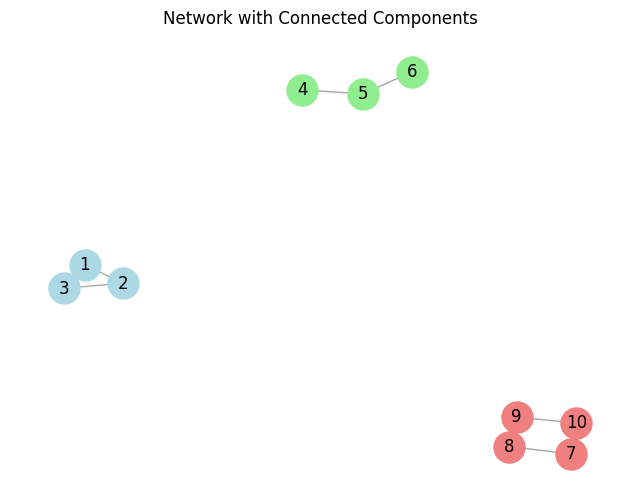

Number of connected components: 3

Components:
  Component 1: {1, 2, 3}
  Component 2: {4, 5, 6}
  Component 3: {8, 9, 10, 7}

Largest component has 4 nodes


In [51]:
# Create a network with multiple components
G_components = nx.Graph()
G_components.add_edges_from([
    # Component 1
    (1, 2), (2, 3), (3, 1),
    # Component 2
    (4, 5), (5, 6),
    # Component 3
    (7, 8), (8, 9), (9, 10), (10, 7)
])

# Visualize the components
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_components, seed=42)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for i, component in enumerate(components):
    nx.draw_networkx_nodes(G_components, pos, nodelist=list(component), node_color=colors[i % len(colors)], node_size=500)
nx.draw_networkx_edges(G_components, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G_components, pos, font_size=12)
plt.title("Network with Connected Components")
plt.axis('off')
plt.show()

# Find connected components
components = list(nx.connected_components(G_components))
print(f"Number of connected components: {len(components)}")
print("\nComponents:")
for i, component in enumerate(components, 1):
    print(f"  Component {i}: {component}")

# Get largest component
largest_cc = max(components, key=len)
print(f"\nLargest component has {len(largest_cc)} nodes")



Weakly connected components: 2
  WCC 1: {1, 2, 3, 4, 5}
  WCC 2: {6, 7}

Strongly connected components (excluding single nodes): 2
  SCC 1: {1, 2, 3}
  SCC 2: {6, 7}


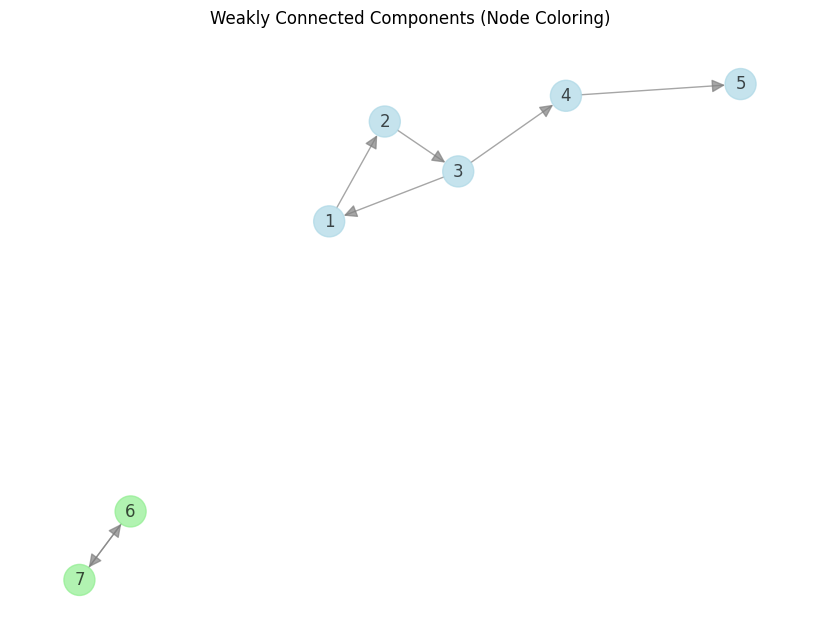

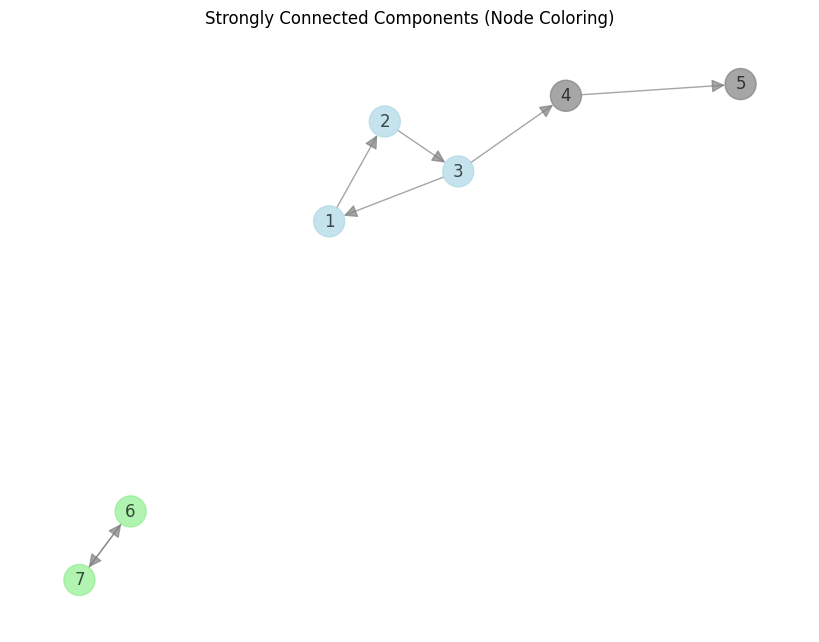

In [55]:
# For directed graphs: weakly and strongly connected components
DG_components = nx.DiGraph()
DG_components.add_edges_from([
    (1, 2), (2, 3), (3, 1),  # Strongly connected
    (3, 4), (4, 5),          # Only weakly connected to first group
    (6, 7), (7, 6)           # Another strongly connected component
])

# Weakly connected: components when treating edges as undirected
weak_components = list(nx.weakly_connected_components(DG_components))
print(f"Weakly connected components: {len(weak_components)}")
for i, comp in enumerate(weak_components, 1):
    print(f"  WCC {i}: {comp}")

# Strongly connected: components where you can reach every node from every other node
strong_components = list(nx.strongly_connected_components(DG_components))

# Filter out components with only one node for printing
filtered_strong_components = [comp for comp in strong_components if len(comp) > 1]

print(f"\nStrongly connected components (excluding single nodes): {len(filtered_strong_components)}")
for i, comp in enumerate(filtered_strong_components, 1):
    print(f"  SCC {i}: {comp}")

# Visualize weakly connected components by coloring nodes in the full graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG_components, seed=42) # Use the same layout for consistency
colors_weak = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon'] # More colors if needed
node_colors_weak = []
for node in DG_components.nodes():
    for i, comp in enumerate(weak_components):
        if node in comp:
            node_colors_weak.append(colors_weak[i % len(colors_weak)])
            break
    else:
        node_colors_weak.append('gray') # Fallback color

nx.draw(DG_components, pos, node_color=node_colors_weak, node_size=500,
        with_labels=True, font_size=12, arrows=True, arrowsize=20, edge_color='gray', alpha=0.7)
plt.title("Weakly Connected Components (Node Coloring)")
plt.axis('off')
plt.show()


# Visualize strongly connected components by coloring nodes in the full graph
plt.figure(figsize=(8, 6))
# Use the same layout for consistency
colors_strong = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon', 'lavender', 'paleturquoise'] # More colors if needed
node_colors_strong = []
single_node_color = 'gray' # Color for single-node components
component_colors = {}
color_index = 0

for comp in strong_components:
    if len(comp) > 1:
        component_colors[tuple(sorted(comp))] = colors_strong[color_index % len(colors_strong)]
        color_index += 1
    else:
        # Assign the single node color
        component_colors[tuple(sorted(comp))] = single_node_color

for node in DG_components.nodes():
    for comp in strong_components:
        if node in comp:
            node_colors_strong.append(component_colors[tuple(sorted(comp))])
            break
    else:
         node_colors_strong.append('gray') # Should not happen if all nodes are in some component


nx.draw(DG_components, pos, node_color=node_colors_strong, node_size=500,
        with_labels=True, font_size=12, arrows=True, arrowsize=20, edge_color='gray', alpha=0.7)
plt.title("Strongly Connected Components (Node Coloring)")
plt.axis('off')
plt.show()

### 6.2 Shortest Paths

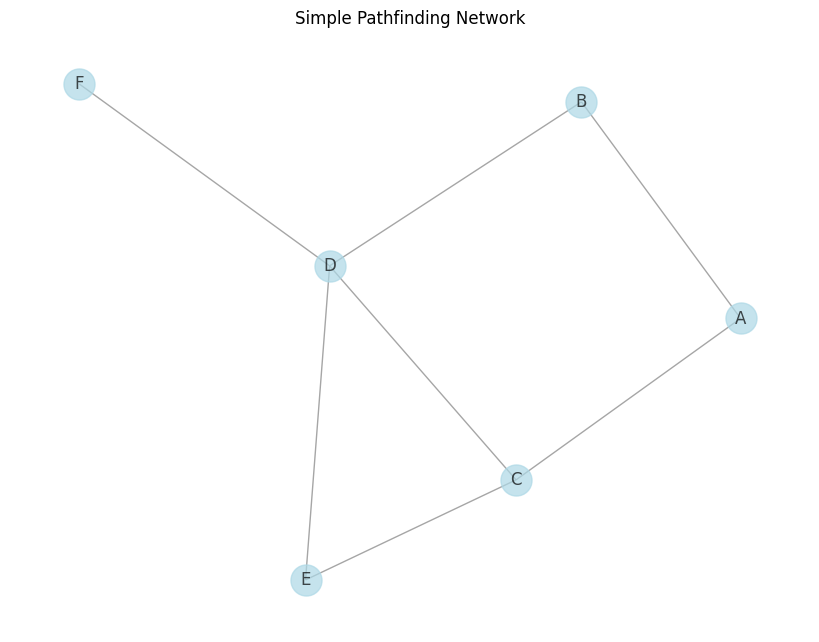

Shortest path from A to F: A -> B -> D -> F
Path length: 3 edges
Shortest path length: 3


In [56]:
# Create a simple network
G_paths = nx.Graph()
G_paths.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F')
])

# Visualize the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_paths, seed=42)
nx.draw(G_paths, pos, with_labels=True, node_color='lightblue',
        node_size=500, font_size=12, edge_color='gray', alpha=0.7)
plt.title("Simple Pathfinding Network")
plt.show()

# Find shortest path between two nodes
path = nx.shortest_path(G_paths, source='A', target='F')
print(f"Shortest path from A to F: {' -> '.join(path)}")
print(f"Path length: {len(path) - 1} edges")

# Get length of shortest path
path_length = nx.shortest_path_length(G_paths, source='A', target='F')
print(f"Shortest path length: {path_length}")

In [43]:
# All shortest paths from one node
all_paths = nx.single_source_shortest_path_length(G_paths, 'A')
print("Distance from A to all other nodes:")
for node, distance in all_paths.items():
    print(f"  A -> {node}: {distance}")

Distance from A to all other nodes:
  A -> A: 0
  A -> B: 1
  A -> C: 1
  A -> D: 2
  A -> E: 2
  A -> F: 3


### 6.3 Average Path Length and Diameter

In [44]:
# These metrics only work on connected graphs
if nx.is_connected(G_paths):
    # Average shortest path length
    avg_path = nx.average_shortest_path_length(G_paths)
    print(f"Average shortest path length: {avg_path:.3f}")

    # Diameter (longest shortest path)
    diameter = nx.diameter(G_paths)
    print(f"Network diameter: {diameter}")
else:
    print("Network is not connected. Calculate for largest component.")
    largest_cc = max(nx.connected_components(G_paths), key=len)
    G_largest = G_paths.subgraph(largest_cc).copy()
    avg_path = nx.average_shortest_path_length(G_largest)
    diameter = nx.diameter(G_largest)
    print(f"Largest component average path length: {avg_path:.3f}")
    print(f"Largest component diameter: {diameter}")

Average shortest path length: 1.600
Network diameter: 3


---

## 7. Advanced Network Analysis

### 7.1 Clustering Coefficient

Measures the tendency of nodes to cluster together (how likely are your friends to be friends with each other?).

In [57]:
# Global clustering coefficient (transitivity)
G_cluster = nx.karate_club_graph()
global_clustering = nx.transitivity(G_cluster)
print(f"Global clustering coefficient: {global_clustering:.4f}")

# Average local clustering coefficient
avg_clustering = nx.average_clustering(G_cluster)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# Local clustering for individual nodes
local_clustering = nx.clustering(G_cluster)
print("\nTop 5 nodes by local clustering:")
for node, coef in sorted(local_clustering.items(),
                         key=lambda x: x[1], reverse=True)[:5]:
    print(f"  Node {node}: {coef:.4f}")

Global clustering coefficient: 0.2557
Average clustering coefficient: 0.5706

Top 5 nodes by local clustering:
  Node 7: 1.0000
  Node 12: 1.0000
  Node 14: 1.0000
  Node 15: 1.0000
  Node 16: 1.0000


### 7.2 Degree Distribution

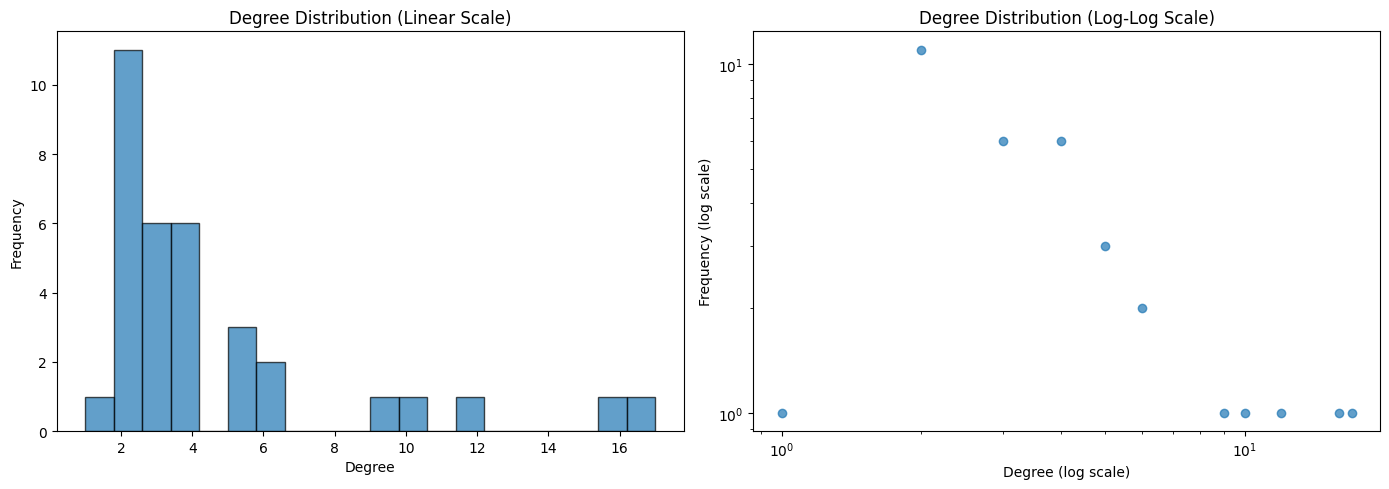

Mean degree: 4.59
Median degree: 3.00
Max degree: 17


In [46]:
# Get degree sequence
degrees = [d for n, d in G_cluster.degree()]

# Plot degree distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].hist(degrees, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Degree Distribution (Linear Scale)')

# Log-log scale (useful for detecting power-law distributions)
degree_counts = pd.Series(degrees).value_counts().sort_index()
axes[1].scatter(degree_counts.index, degree_counts.values, alpha=0.7)
axes[1].set_xlabel('Degree (log scale)')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Degree Distribution (Log-Log Scale)')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

print(f"Mean degree: {np.mean(degrees):.2f}")
print(f"Median degree: {np.median(degrees):.2f}")
print(f"Max degree: {np.max(degrees)}")

### 7.3 Assortativity

Measures whether similar nodes tend to connect (e.g., do high-degree nodes connect to other high-degree nodes?).

In [47]:
# Degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G_cluster)
print(f"Degree assortativity: {degree_assortativity:.4f}")

if degree_assortativity > 0:
    print("Positive assortativity: high-degree nodes tend to connect to high-degree nodes")
elif degree_assortativity < 0:
    print("Negative assortativity: high-degree nodes tend to connect to low-degree nodes")
else:
    print("No degree assortativity")

Degree assortativity: -0.4756
Negative assortativity: high-degree nodes tend to connect to low-degree nodes


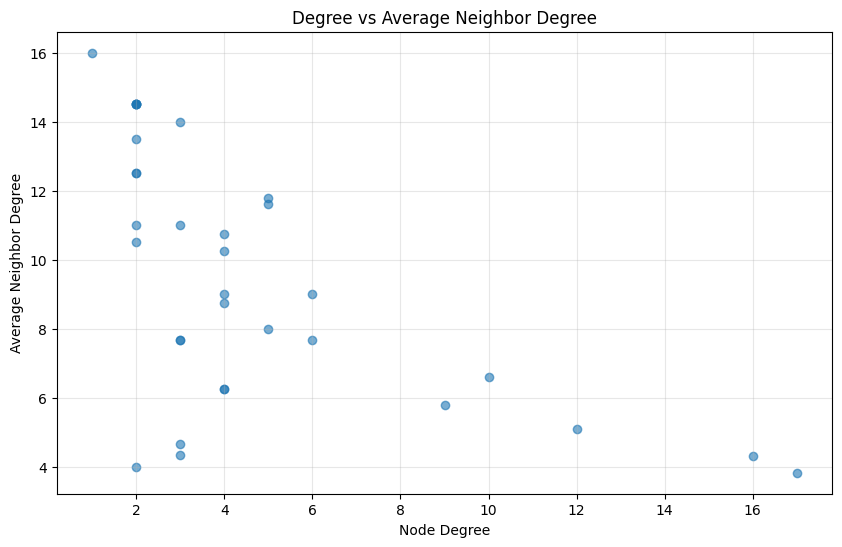

In [48]:
# Average neighbor degree
avg_neighbor_degree = nx.average_neighbor_degree(G_cluster)

# Plot relationship
node_degrees = dict(G_cluster.degree())

plt.figure(figsize=(10, 6))
plt.scatter([node_degrees[n] for n in G_cluster.nodes()],
           [avg_neighbor_degree[n] for n in G_cluster.nodes()],
           alpha=0.6)
plt.xlabel('Node Degree')
plt.ylabel('Average Neighbor Degree')
plt.title('Degree vs Average Neighbor Degree')
plt.grid(alpha=0.3)
plt.show()